In [1]:
import networkx as nx
import numpy as np
from pgmpy.models import MarkovModel

In [2]:
G = MarkovModel()
G.add_node('a')
nx.draw_networkx(G)

/opt/conda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


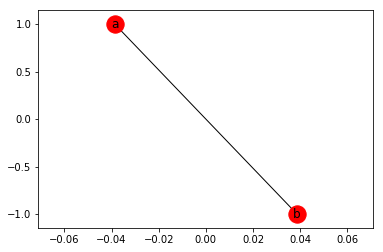

In [3]:
G.add_edge('a', 'b')
nx.draw_networkx(G)

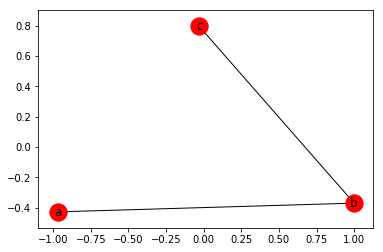

In [4]:
G.add_edges_from([('a', 'b'), ('b', 'c')])
nx.draw_networkx(G)

In [5]:
'a' in G

True

In [6]:
len(G)

3

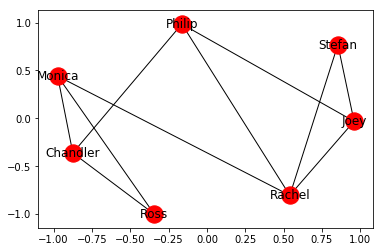

In [7]:
from pgmpy.models import MarkovModel
mm = MarkovModel()
# adding the group of friends as nodes of a graph
mm.add_nodes_from(['Joey', 'Rachel', 'Monica', 'Ross', 'Chandler', 'Stefan', 'Philip'])
# adding various edges for example purpose
mm.add_edges_from([('Joey', 'Rachel'), ('Joey', 'Stefan'), ('Joey','Philip'), 
                   ('Rachel', 'Monica'), ('Rachel', 'Stefan'), ('Rachel', 'Philip'),
                   ('Monica', 'Ross'), ('Monica', 'Chandler'), ('Ross', 'Chandler'), ('Chandler','Philip')])
nx.draw_networkx(mm)

In [8]:
mm.get_local_independencies()

(Joey _|_ Ross, Monica, Chandler | Rachel, Philip, Stefan)
(Rachel _|_ Ross, Chandler | Philip, Monica, Joey, Stefan)
(Monica _|_ Philip, Joey, Stefan | Ross, Rachel, Chandler)
(Ross _|_ Philip, Rachel, Joey, Stefan | Monica, Chandler)
(Chandler _|_ Rachel, Joey, Stefan | Ross, Philip, Monica)
(Stefan _|_ Ross, Philip, Monica, Chandler | Rachel, Joey)
(Philip _|_ Ross, Monica, Stefan | Rachel, Joey, Chandler)

In [9]:
from pgmpy.factors.discrete import DiscreteFactor
phi = [DiscreteFactor(edge, [2, 2], np.random.rand(4)) for edge in mm.edges()]
mm.add_factors(*phi)

In [10]:
mm.get_cardinality()

defaultdict(int,
            {'Joey': 2,
             'Rachel': 2,
             'Stefan': 2,
             'Philip': 2,
             'Monica': 2,
             'Ross': 2,
             'Chandler': 2})

In [11]:
mm.get_cardinality(node='Rachel')

2

In [12]:
mm.get_factors()

[<DiscreteFactor representing phi(Joey:2, Rachel:2) at 0x7f957f4ea978>,
 <DiscreteFactor representing phi(Joey:2, Stefan:2) at 0x7f957f4ea5c0>,
 <DiscreteFactor representing phi(Joey:2, Philip:2) at 0x7f957f4ea0f0>,
 <DiscreteFactor representing phi(Rachel:2, Monica:2) at 0x7f957f4ea710>,
 <DiscreteFactor representing phi(Rachel:2, Stefan:2) at 0x7f957f4ea7b8>,
 <DiscreteFactor representing phi(Rachel:2, Philip:2) at 0x7f957f4ea6a0>,
 <DiscreteFactor representing phi(Monica:2, Ross:2) at 0x7f957f4ea4e0>,
 <DiscreteFactor representing phi(Monica:2, Chandler:2) at 0x7f957f4ea550>,
 <DiscreteFactor representing phi(Ross:2, Chandler:2) at 0x7f957f4ea470>,
 <DiscreteFactor representing phi(Chandler:2, Philip:2) at 0x7f957f4ea400>]

In [13]:
mm.get_factors('Monica')

[<DiscreteFactor representing phi(Rachel:2, Monica:2) at 0x7f957f4ea710>,
 <DiscreteFactor representing phi(Monica:2, Ross:2) at 0x7f957f4ea4e0>,
 <DiscreteFactor representing phi(Monica:2, Chandler:2) at 0x7f957f4ea550>]

In [14]:
mm.get_factors('Rachel')

[<DiscreteFactor representing phi(Joey:2, Rachel:2) at 0x7f957f4ea978>,
 <DiscreteFactor representing phi(Rachel:2, Monica:2) at 0x7f957f4ea710>,
 <DiscreteFactor representing phi(Rachel:2, Stefan:2) at 0x7f957f4ea7b8>,
 <DiscreteFactor representing phi(Rachel:2, Philip:2) at 0x7f957f4ea6a0>]

In [15]:
mm.get_partition_function()

0.03886733679303363

In [16]:
for dd in mm.markov_blanket('Chandler'):
    print(dd)

Monica
Ross
Philip


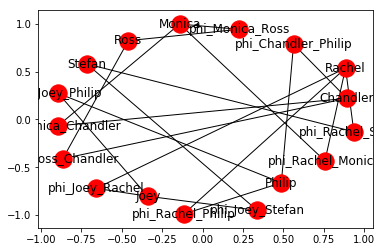

In [17]:
factor_graph = mm.to_factor_graph()
nx.draw_networkx(factor_graph)

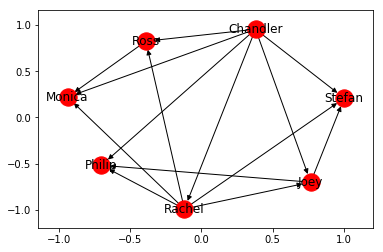

In [18]:
bm = mm.to_bayesian_model()
nx.draw_networkx(bm)